In [3]:
import pandas as pd

iris_data = pd.read_csv('/Users/babburi/Documents/Classroom/DataScience/MyFirstRepo/iris-data.csv', na_values=['NA'])
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# this line tells the notebook to show plots inside the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb


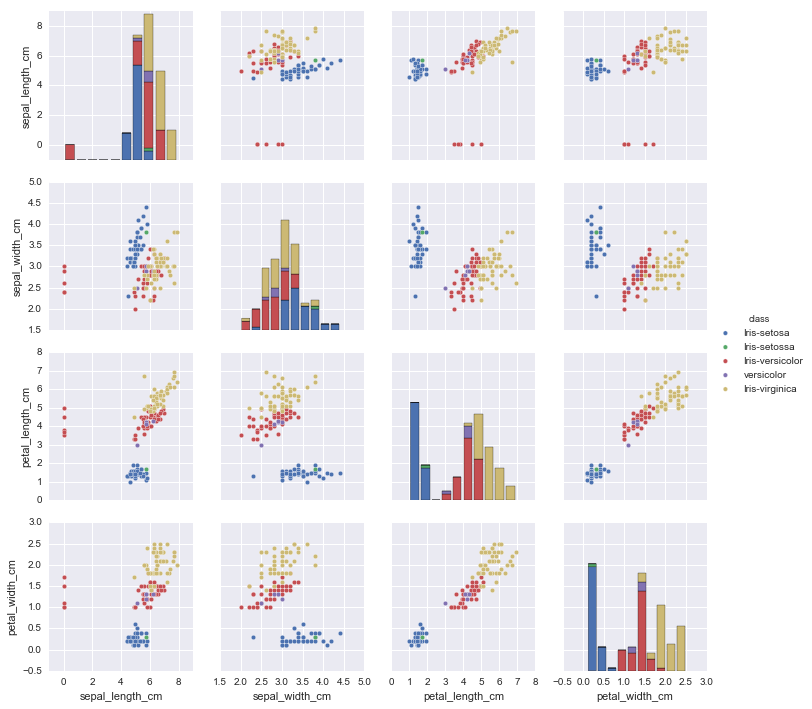

In [6]:
# we have to temporarily drop the NA values
# because the seaborn plotting function does not know
# what to do with them

sb.pairplot(iris_data.dropna(), hue='class')

In [7]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

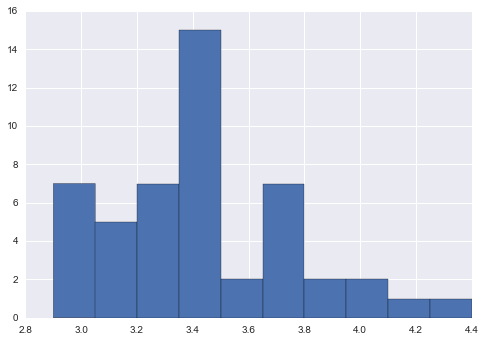

In [8]:
# drop any 'Iris-setosa' rows with sepal width less than 2.5 cm

iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]

iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

In [9]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


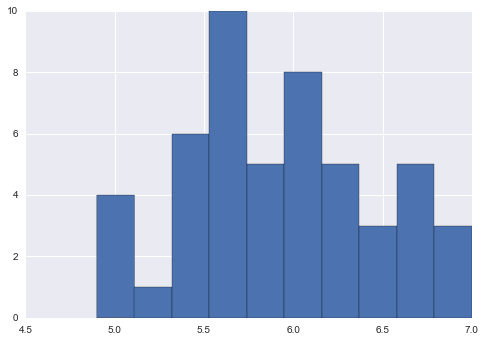

In [10]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & 
              (iris_data['sepal_length_cm'] < 1.0), 
              'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

In [11]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
             (iris_data['sepal_width_cm'].isnull()) |
             (iris_data['petal_length_cm'].isnull()) |
             (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


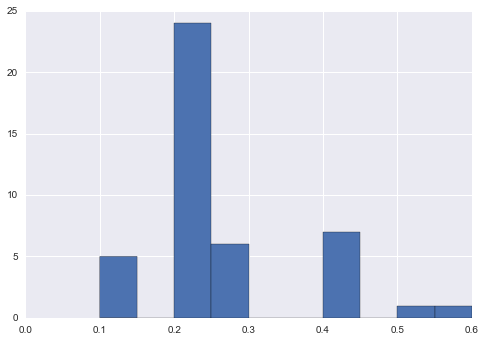

In [12]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

In [13]:
setosa_avg_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') & 
              (iris_data['petal_width_cm'].isnull()), 
             'petal_width_cm'] = setosa_avg_petal_width

iris_data.loc[(iris_data['class'] == 'Iris-setosa') & (iris_data['petal_width_cm'] == setosa_avg_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [14]:
iris_data.to_csv('/Users/babburi/Documents/Classroom/DataScience/MyFirstRepo/iris-data_clean.csv', index=False)

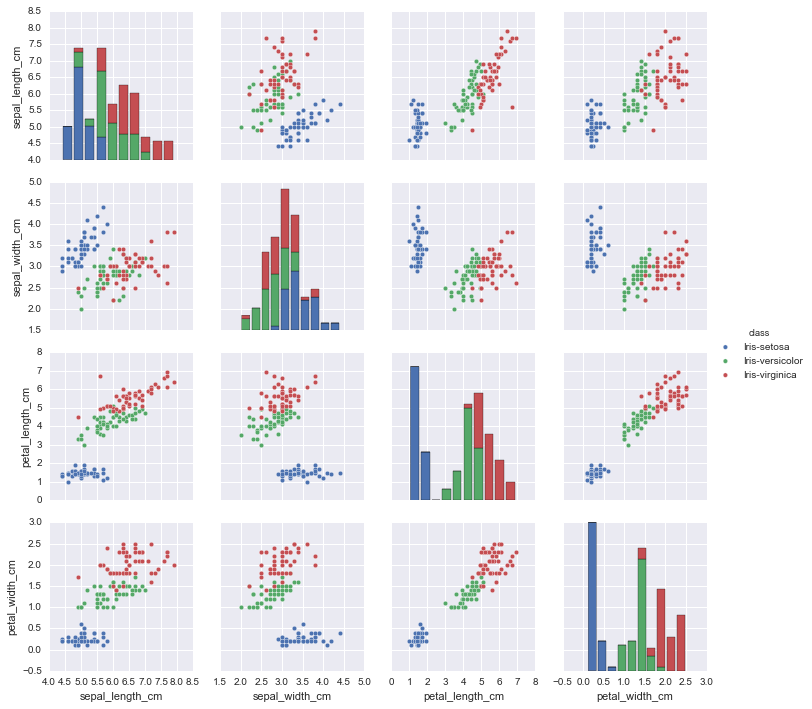

In [15]:
iris_data_clean = pd.read_csv('/Users/babburi/Documents/Classroom/DataScience/MyFirstRepo/iris-data_clean.csv')

sb.pairplot(iris_data_clean, hue = 'class')

In [16]:
assert len(iris_data_clean['class'].unique()) == 3

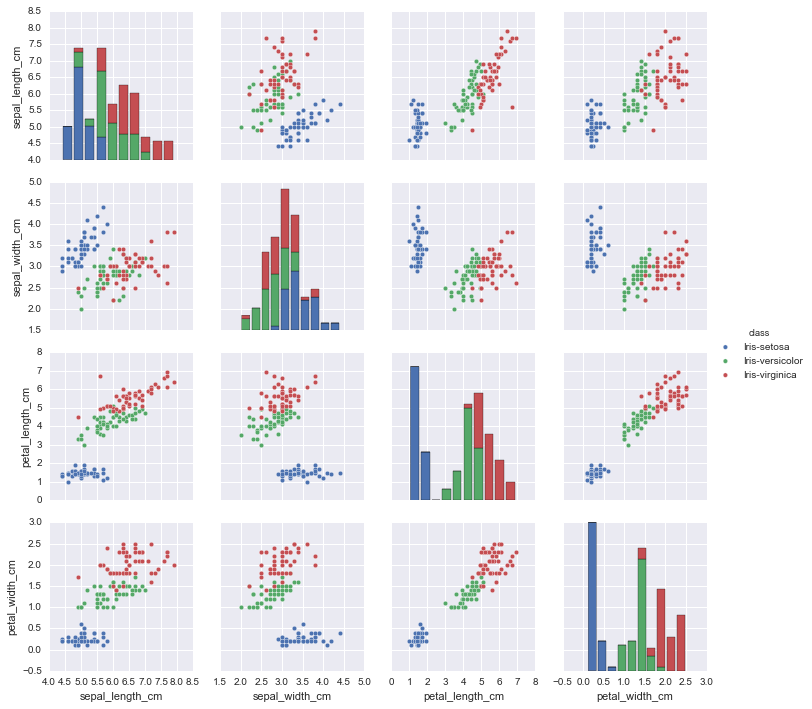

In [17]:
sb.pairplot(iris_data_clean, hue='class')

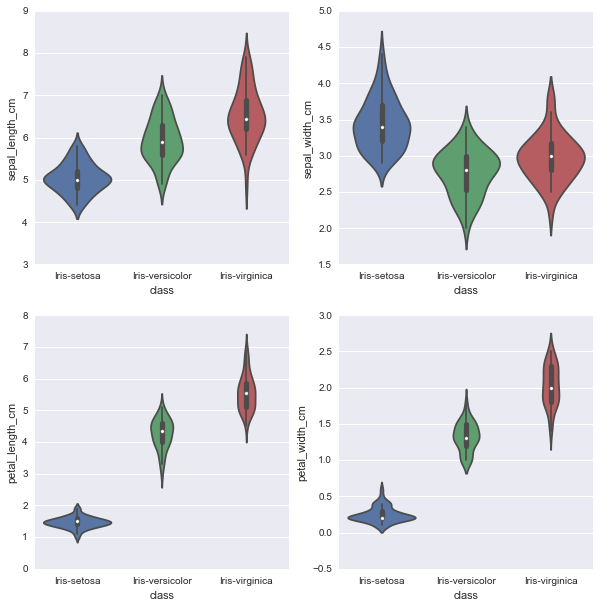

In [18]:
plt.figure(figsize= (10, 10))

for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=iris_data_clean)

In [19]:
iris_data_clean = pd.read_csv('/Users/babburi/Documents/Classroom/DataScience/MyFirstRepo/iris-data_clean.csv')

# Using all four measurements as inputs
# Extract values in a matrix

all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']].values

# Extract the classes

all_classes = iris_data_clean['class'].values

all_inputs[:5]


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [20]:
from sklearn.cross_validation import train_test_split

(training_inputs, testing_inputs,
 training_classes, testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1)

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Create the calssifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the test set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.97368421052631582

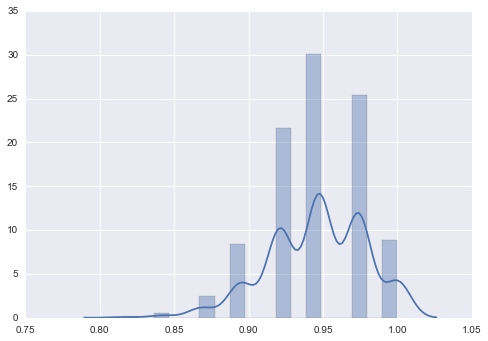

In [22]:
model_accuracies = []

for repitition in range(1000):
    (training_inputs, testing_inputs,
     training_classes, testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
    # Create the calssifier
    decision_tree_classifier = DecisionTreeClassifier()

    # Train the classifier on the training set
    decision_tree_classifier.fit(training_inputs, training_classes)

    # Validate the classifier on the test set using classification accuracy
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    
    # save model accuracies
    model_accuracies.append(classifier_accuracy)
    
# plot the accuracies
sb.distplot(model_accuracies)

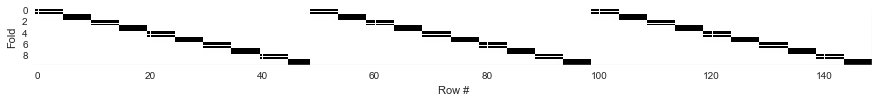

In [23]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold

def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize= (15, 15))
    plt.imshow(masks, interpolation='none')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(all_classes, n_folds=10), len(all_classes))

    

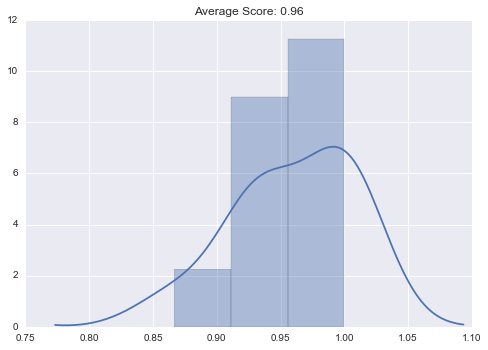

In [26]:
from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average Score: {}'.format(np.mean(cv_scores)))


In [29]:
from sklearn.grid_search import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth' : [1, 2, 3, 4, 5],
                 'max_features' : [1, 2, 3, 4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                          param_grid=parameter_grid,
                          cv=cross_validation)
grid_search.fit(all_inputs, all_classes)

print('Best Score: {}'.format(grid_search.best_score_))
print('Best Parameters: {}'.format(grid_search.best_params_))

Best Score: 0.959731543624
Best Parameters: {'max_features': 4, 'max_depth': 3}


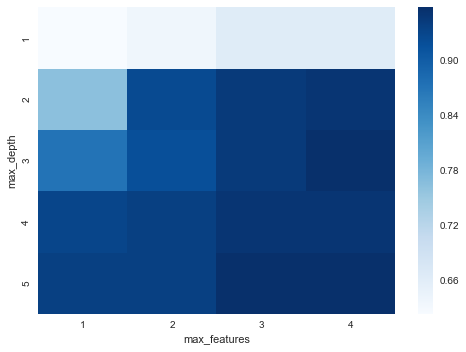

In [42]:
grid_visualization = []

for grid_pair in grid_search.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'][::-1])
plt.xlabel('max_features')
plt.ylabel('max_depth')

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

# extract data
iris_data_clean = pd.read_csv('/Users/babburi/Documents/Classroom/DataScience/MyFirstRepo/iris-data_clean.csv')

# Testing the data: analysis will stop if any of the below assertions are wrong

# Classifier should have only three classes
assert len(iris_data_clean['class'].unique()) == 3

# sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

# data set should not have any missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                              (iris_data_clean['sepal_width_cm'].isnull()) |
                              (iris_data_clean['petal_length_cm'].isnull()) |
                              (iris_data_clean['petal_width_cm'].isnull())]) == 0

all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_classes = iris_data_clean['class'].values

# classifer
random_forest_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                                 max_depth=None, max_features=3, max_leaf_nodes=None,
                                                 min_samples_leaf=1, min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                                                 oob_score=False, random_state=None, verbose=0, warm_start=True)
# plot the cross validation scores
rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_classes, cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores, jitter=True, color='white')

# output some predictions from the classifier
(training_inputs, testing_inputs,
training_classes, testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)

random_forest_classifier.fit(training_inputs, training_classes)
for input_features, prediction, actual in zip(testing_inputs[:10],
                                             random_forest_classifier.predict(testing_inputs[:10]),
                                             testing_classes[:10]):
    print('{}\t->\t{}\t(Actual:{})'.format(input_features, prediction, actual))